# Section 1: Business Understanding

This project targets home owners who are considering renting out their home on AirBnB or home owners who already do so and want to maximize the return they get from their rentals. This project looks at three questions:
1. Which listing attributes have the highest impact on the listing's price?
2. How do the prices of superhost's listings differ from the prices of regular host's listings?
3. How well can we predict a listing's price?

In order to analyze AirBnB listings, I used two datasets that are available on Kaggle — an online-community for data scientists and machine learning engineers. The two datasets include AirBnB listings from Berlin and Boston. You can find the references to the datasets and the code I developed for conducting the analysis at the end of this post.

## What you can expect to find within this Jupyter Notebook
This Jupyter Notebook is the first of two Jupyter Notebooks created with the objective to retrieve meaningful insights from the AirBnb datasets of Berlin and Boston. This first Jupyter Notebook focusses on everything related to the data preparations, including reading in the raw data, choosing relevant columns, dropping columns with too many NaN values, converting missleading datatypes on columns, imputing missing values, and transforming categorical values into columns usable in linear regression modelling. At the end of this Jupyter Notebook two dataframes (my_berlin and my_boston) are converted into csv-files and saved within the directory. These two dataframes will then be the starting point of the second Jupyter Notebook. You can find it in this directory with the name AirBnBDataScience). 

## Reading in required libraries and configuring global settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline
pd.options.mode.chained_assignment = None

# Section 2: Data Understanding

## Reading in the relevant datasets for Berlin and Boston

In [2]:
berlin_listings = pd.read_csv('./berlin_listings_summary.csv')
berlin_listings.shape

(22552, 96)

In [3]:
berlin_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
boston_listings = pd.read_csv('./boston_listings.csv')
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

## Deciding on the most relevant columns for this Analysis

Please note: all columns containing text-field information were not considered for analysis.

In [6]:
relevant_columns = [
    # columns associated to the host
    'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 
    'host_has_profile_pic', 'host_identity_verified', 'host_listings_count', 'host_total_listings_count', 
    # columns associated to the listing's characteristics
    'is_location_exact', 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'square_feet', 
    # columns associated to the booking policy
    'guests_included', 'minimum_nights', 'maximum_nights', 'price', 'security_deposit', 'instant_bookable', 
    'cancellation_policy',
    # columns associated to the reviews
    'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value']

In [7]:
my_berlin = berlin_listings[relevant_columns]

In [8]:
my_boston = boston_listings[relevant_columns]

## Checking for NaN Values

In [9]:
my_berlin.isna().mean().sort_values()

number_of_reviews              0.000000
cancellation_policy            0.000000
instant_bookable               0.000000
price                          0.000000
maximum_nights                 0.000000
minimum_nights                 0.000000
guests_included                0.000000
is_location_exact              0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bedrooms                       0.000798
host_since                     0.001153
host_total_listings_count      0.001153
host_listings_count            0.001153
host_identity_verified         0.001153
host_has_profile_pic           0.001153
host_is_superhost              0.001153
bathrooms                      0.001419
beds                           0.001774
reviews_per_month              0.173554
review_scores_rating           0.194617
review_scores_cleanliness      0.195592
review_scores_accuracy         0.195725
review_scores_communication    0.195903


In [10]:
my_boston.isna().mean().sort_values()

host_since                     0.000000
maximum_nights                 0.000000
price                          0.000000
instant_bookable               0.000000
accommodates                   0.000000
room_type                      0.000000
guests_included                0.000000
is_location_exact              0.000000
host_listings_count            0.000000
host_identity_verified         0.000000
host_has_profile_pic           0.000000
host_is_superhost              0.000000
cancellation_policy            0.000000
number_of_reviews              0.000000
host_total_listings_count      0.000000
minimum_nights                 0.000000
property_type                  0.000837
beds                           0.002510
bedrooms                       0.002789
bathrooms                      0.003905
host_response_rate             0.131381
host_response_time             0.131381
reviews_per_month              0.210879
review_scores_rating           0.226778
review_scores_communication    0.228173


# Section 3: Data Preparation

## Remove columns with too many missing values

Most columns have very few / zero missing values. That is great and it is a sign of quality for the two chosen datasets. However, some columns have a share of missing values that requires us to deal with in more detail. 
Two columns (square_feet and security_deposit) will be dropped completly.

In [11]:
print('The column square_feet has',
      round(100 * my_berlin['square_feet'].isna().mean(), 2),
      '% of missing values in the Berlin dataset and',
      round(100 * my_boston['square_feet'].isna().mean(), 2),
      '% of missing values in the Boston dataset. ',
      'It is thus removed from our Analysis since imputing these values would deveate very far from the real world.'
     )
my_berlin.drop(columns = 'square_feet', inplace = True)
my_boston.drop(columns = 'square_feet', inplace = True)

The column square_feet has 98.02 % of missing values in the Berlin dataset and 98.44 % of missing values in the Boston dataset.  It is thus removed from our Analysis since imputing these values would deveate very far from the real world.


In [12]:
print('The column security_deposit has',
      round(100 * my_berlin['security_deposit'].isna().mean(), 2),
      '% of missing values in the Berlin dataset and',
      round(100 * my_boston['security_deposit'].isna().mean(), 2),
      '% of missing values in the Boston dataset. ',
      'It is thus removed from our Analysis since imputing these values would deveate very far from the real world.'
     )
my_berlin.drop(columns = 'security_deposit', inplace = True)
my_boston.drop(columns = 'security_deposit', inplace = True)

The column security_deposit has 41.51 % of missing values in the Berlin dataset and 62.57 % of missing values in the Boston dataset.  It is thus removed from our Analysis since imputing these values would deveate very far from the real world.


## Currency columns are converted to datatype float

The currency columns are originally stored with datatype object. We remove the leading $-sign, remove the thousand separator ',', and then convert the values into datatype float.

Column price

In [13]:
print('The column price has',
      my_berlin['price'].isna().sum(),
      'missing values in the Berlin dataset and',
      my_boston['price'].isna().sum(),
      'missing values in the Boston dataset.'
     )

The column price has 0 missing values in the Berlin dataset and 0 missing values in the Boston dataset.


In [14]:
my_berlin['price'] = my_berlin['price'].str[1:]
my_berlin['price'] = my_berlin['price'].str.replace(',', '')
my_berlin['price'] = my_berlin['price'].astype(float, errors = 'raise')

In [15]:
my_boston['price'] = my_boston['price'].str[1:]
my_boston['price'] = my_boston['price'].str.replace(',', '')
my_boston['price'] = my_boston['price'].astype(float, errors = 'raise')

## Transform boolean columns to data type boolean

Column host_is_superhost contains two values: t for True und f for False

In [16]:
print('Berlin values:', my_berlin['host_is_superhost'].unique())
print('Boston values:', my_boston['host_is_superhost'].unique())

Berlin values: ['t' 'f' nan]
Boston values: ['f' 't']


In [17]:
my_berlin['host_is_superhost'].value_counts()

f    19515
t     3011
Name: host_is_superhost, dtype: int64

Since the vast majority of values within the Berlin dataset's host_is_superhost column have the value f for False, the NaN values of this column will be imputed with False.

In [18]:
my_berlin['host_is_superhost'] = my_berlin['host_is_superhost'].str.replace('f', 'False')
my_berlin['host_is_superhost'] = my_berlin['host_is_superhost'].str.replace('t', 'True')
my_berlin['host_is_superhost'] = my_berlin['host_is_superhost'] == 'True'

In [19]:
my_boston['host_is_superhost'] = my_boston['host_is_superhost'].str.replace('f', 'False')
my_boston['host_is_superhost'] = my_boston['host_is_superhost'].str.replace('t', 'True')
my_boston['host_is_superhost'] = my_boston['host_is_superhost'] == 'True'

Column host_has_profile_pic with values t for True and f for False

In [20]:
print('For the Berlin dataset the column host_has_profile_picture contains', 
      100 * round(my_berlin['host_has_profile_pic'].isna().mean(),4),
      '% NaN values. Since',
      100 * round((my_berlin['host_has_profile_pic'] == 't').sum()/len(my_berlin),4),
      '% of values are True the NaN values will be imputed as True values.'
     )

For the Berlin dataset the column host_has_profile_picture contains 0.12 % NaN values. Since 99.64 % of values are True the NaN values will be imputed as True values.


In [21]:
my_berlin['host_has_profile_pic'] = my_berlin['host_has_profile_pic'].str.replace('f', 'False')
my_berlin['host_has_profile_pic'] = my_berlin['host_has_profile_pic'].str.replace('t', 'True')
my_berlin['host_has_profile_pic'].fillna(value='True', inplace = True)

my_berlin['host_has_profile_pic'] = my_berlin['host_has_profile_pic'] == 'True'

In [22]:
print('For the Boston dataset the column host_has_profile_picture contains', 
      my_boston['host_has_profile_pic'].isna().sum(),
      'missing values.'
     )

For the Boston dataset the column host_has_profile_picture contains 0 missing values.


In [23]:
my_boston['host_has_profile_pic'] = my_boston['host_has_profile_pic'].str.replace('f', 'False')
my_boston['host_has_profile_pic'] = my_boston['host_has_profile_pic'].str.replace('t', 'True')

my_boston['host_has_profile_pic'] = my_boston['host_has_profile_pic'] == 'True'

Column host_identity_verified

In [24]:
print('For the Berlin dataset the column host_identity_verified contains', 
      100 * round(my_berlin['host_identity_verified'].isna().mean(),4),
      '% NaN values. Since',
      100 * round((my_berlin['host_identity_verified'] == 'f').sum()/len(my_berlin),4),
      '% of values are False the NaN values will be imputed as False values.'
     )

For the Berlin dataset the column host_identity_verified contains 0.12 % NaN values. Since 61.3 % of values are False the NaN values will be imputed as False values.


In [25]:
my_berlin['host_identity_verified'] = my_berlin['host_identity_verified'].str.replace('f', 'False')
my_berlin['host_identity_verified'] = my_berlin['host_identity_verified'].str.replace('t', 'True')
my_berlin['host_identity_verified'].fillna(value='False', inplace = True)

my_berlin['host_identity_verified'] = my_berlin['host_identity_verified'] == 'True'

In [26]:
print('For the Boston dataset the column host_identity_verified contains', 
      my_boston['host_identity_verified'].isna().sum(),
      'missing values.'
     )

For the Boston dataset the column host_identity_verified contains 0 missing values.


In [27]:
my_boston['host_identity_verified'] = my_boston['host_identity_verified'].str.replace('f', 'False')
my_boston['host_identity_verified'] = my_boston['host_identity_verified'].str.replace('t', 'True')

my_boston['host_identity_verified'] = my_boston['host_identity_verified'] == 'True'

Column is_location_exact

In [28]:
print('The column is_location_exact contains', 
      my_berlin['host_identity_verified'].isna().sum(),
      'missing values for the Berlin dataset and ',
      my_boston['host_identity_verified'].isna().sum(),
      'for the Boston dataset.'
     )

The column is_location_exact contains 0 missing values for the Berlin dataset and  0 for the Boston dataset.


In [29]:
my_berlin['is_location_exact'] = my_berlin['is_location_exact'].str.replace('f', 'False')
my_berlin['is_location_exact'] = my_berlin['is_location_exact'].str.replace('t', 'True')

my_berlin['is_location_exact'] = my_berlin['is_location_exact'] == 'True'

In [30]:
my_boston['is_location_exact'] = my_boston['is_location_exact'].str.replace('f', 'False')
my_boston['is_location_exact'] = my_boston['is_location_exact'].str.replace('t', 'True')

my_boston['is_location_exact'] = my_boston['is_location_exact'] == 'True'

Column instant_bookable

In [31]:
print('The column instant_bookable contains', 
      my_berlin['instant_bookable'].isna().sum(),
      'missing values for the Berlin dataset and ',
      my_boston['instant_bookable'].isna().sum(),
      'for the Boston dataset.'
     )

The column instant_bookable contains 0 missing values for the Berlin dataset and  0 for the Boston dataset.


In [32]:
my_berlin['instant_bookable'] = my_berlin['instant_bookable'].str.replace('f', 'False')
my_berlin['instant_bookable'] = my_berlin['instant_bookable'].str.replace('t', 'True')
my_berlin['instant_bookable'] = my_berlin['instant_bookable'] == 'True'

In [33]:
my_boston['instant_bookable'] = my_boston['instant_bookable'].str.replace('f', 'False')
my_boston['instant_bookable'] = my_boston['instant_bookable'].str.replace('t', 'True')
my_boston['instant_bookable'] = my_boston['instant_bookable'] == 'True'

## Impute NaN in numeric columns with mean

Please note: numeric columns without missing values are not considered here.

In [34]:
num_cols = ['bedrooms', 'host_listings_count', 'host_total_listings_count', 'bathrooms', 'beds',
           'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [35]:
for col in num_cols:
    my_berlin.loc[my_berlin[col].isna(), col] = my_berlin[col].mean()
    my_boston.loc[my_boston[col].isna(), col] = my_boston[col].mean()

## Transform dates into durations

Column host_since

In [36]:
my_berlin['host_since'].sort_values(ascending=False)[0:1]

22542    2018-11-06
Name: host_since, dtype: object

The maximum value for the host_since column in the Berlin dataset is Nov. 06, 2018. The description of the Berlin dataset on Kaggle states that 'The datasets were scraped on November 07th, 2018.' We thus assume that the duration of the host being registered at AirBnB can be calcuated as the difference between the host_since column and the maximum of that column + 1. 
We apply the same method for the Boston data although no information was available on the date on which the boston dataset was scraped.

In [37]:
my_berlin['host_duration'] = abs((pd.to_datetime(my_berlin['host_since']) - 
                                  (pd.to_datetime(my_berlin['host_since']).max() + timedelta(days=1))
                                 ).dt.days)
my_berlin['host_duration'].fillna(0, inplace = True)

In [38]:
my_boston['host_duration'] = abs((pd.to_datetime(my_boston['host_since']) - 
                                  (pd.to_datetime(my_boston['host_since']).max() + timedelta(days=1))
                                 ).dt.days)
my_boston['host_duration'].fillna(0, inplace = True)

In [39]:
my_berlin.drop(columns = ['host_since'], inplace = True)
my_boston.drop(columns = ['host_since'], inplace = True)

## Checking all categorical columns and tidying those up by imputing NaN and dealing with outliers. Adding new columns reflecting the categorical columns' contents as 0s and 1s to enable machine readability for the upcoming linear regression.

Column property_type

Apartment             0.896816
Condominium           0.027137
Loft                  0.020397
House                 0.017648
Serviced apartment    0.007760
Hostel                0.005676
Townhouse             0.004390
Guest suite           0.003281
Bed and breakfast     0.002838
Guesthouse            0.002527
Name: property_type, dtype: float64

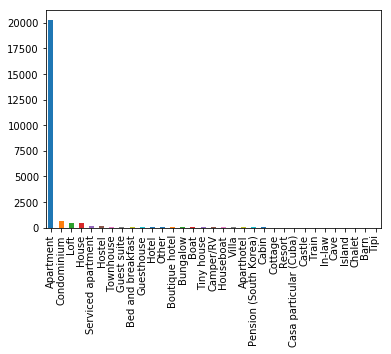

In [40]:
my_berlin['property_type'].value_counts().plot(kind='bar');
my_berlin['property_type'].value_counts()[:10] / len(my_berlin['property_type']) # Limiting output to top ten entries

Apartment          0.728591
House              0.156764
Condominium        0.064435
Townhouse          0.015063
Bed & Breakfast    0.011437
Loft               0.010879
Other              0.004742
Boat               0.003347
Villa              0.001674
Entire Floor       0.001116
Name: property_type, dtype: float64

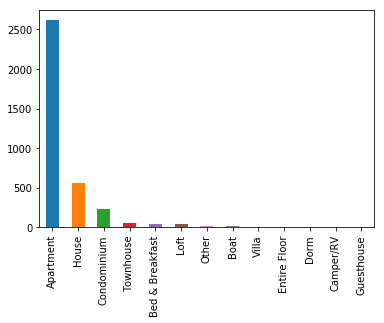

In [41]:
my_boston['property_type'].value_counts().plot(kind='bar');
my_boston['property_type'].value_counts()[:10] / len(my_boston['property_type']) # Limiting output to top ten entries

We will only consider property types that make up for at least 1 percent of the overall listings in Berlin or Boston respectively. All remaining property types are considered rare and are those labeled as "Other".

In [42]:
major_property_types = ['Apartment', 'House', 'Condominium', 'Townhouse', 'Bed & Breakfast', 'Loft']

Apartment      0.896816
Other          0.033611
Condominium    0.027137
Loft           0.020397
House          0.017648
Townhouse      0.004390
Name: property_type, dtype: float64

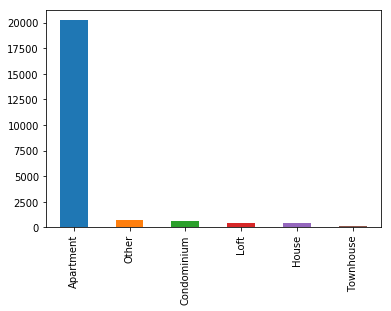

In [43]:
my_berlin['property_type'].replace(to_replace = list(set(my_berlin.property_type.unique()) - set(major_property_types)), value = 'Other', inplace = True)
my_berlin['property_type'].value_counts().plot(kind='bar');
my_berlin['property_type'].value_counts() / len(my_berlin['property_type'])

Apartment          0.728591
House              0.156764
Condominium        0.064435
Townhouse          0.015063
Other              0.012831
Bed & Breakfast    0.011437
Loft               0.010879
Name: property_type, dtype: float64

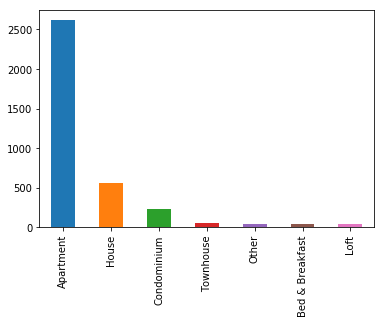

In [44]:
my_boston['property_type'].replace(to_replace = list(set(my_boston.property_type.unique()) - set(major_property_types)), value = 'Other', inplace = True)
my_boston['property_type'].value_counts().plot(kind='bar');
my_boston['property_type'].value_counts() / len(my_boston['property_type'])

In [45]:
my_berlin = pd.concat([my_berlin.drop('property_type', axis=1), 
           pd.get_dummies(my_berlin['property_type'], prefix='property_type')], axis=1)
my_boston = pd.concat([my_boston.drop('property_type', axis=1), 
           pd.get_dummies(my_boston['property_type'], prefix='property_type')], axis=1)

Column host_response_rate

In [46]:
print('The column host_response_rate has',
      round(100 * my_berlin['host_response_rate'].isna().mean(), 2),
      '% of missing values for the Berlin dataset and',
      round(100 * my_boston['host_response_rate'].isna().mean(), 2), 
      '% of missing values for the Boston dataset.'
     )

The column host_response_rate has 57.18 % of missing values for the Berlin dataset and 13.14 % of missing values for the Boston dataset.


It is easily noted that the share of missing values of column host_response_rate in the Berlin dataset exceeds by far the rate of missing values of the same column in the Boston dataset. To account for this issue, we will transform this numeric content into categorical values by builing buckets of response rate ranges.

In [47]:
my_berlin['host_response_rate'] = my_berlin['host_response_rate'].str.replace('%', '').astype(float, errors = 'raise')

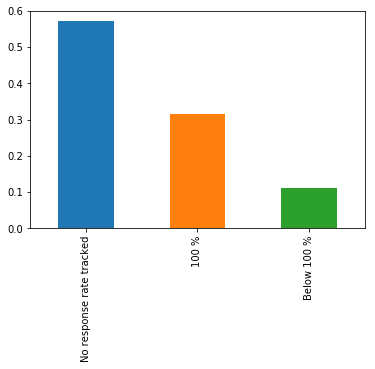

In [48]:
my_berlin['host_response_rate_buckets'] = 'No response rate tracked'
my_berlin.loc[my_berlin['host_response_rate'] == 100, 'host_response_rate_buckets'] = '100 %'
my_berlin.loc[(my_berlin['host_response_rate'] < 100) & (my_berlin['host_response_rate'] >= 0), 
              'host_response_rate_buckets'] = 'Below 100 %'

(my_berlin['host_response_rate_buckets'].value_counts()/len(my_berlin)).plot(kind='bar');

In [49]:
my_boston['host_response_rate'] = my_boston['host_response_rate'].str.replace('%', '').astype(float, errors = 'raise')

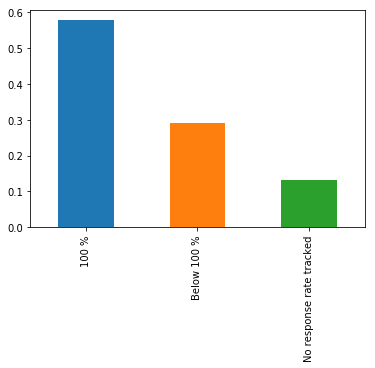

In [50]:
my_boston['host_response_rate_buckets'] = 'No response rate tracked'
my_boston.loc[my_boston['host_response_rate'] == 100, 'host_response_rate_buckets'] = '100 %'
my_boston.loc[(my_boston['host_response_rate'] < 100) & (my_boston['host_response_rate'] >= 0), 
              'host_response_rate_buckets'] = 'Below 100 %'

(my_boston['host_response_rate_buckets'].value_counts()/len(my_boston)).plot(kind='bar');

In [51]:
my_berlin.drop(columns= ['host_response_rate'], inplace = True)
my_boston.drop(columns= ['host_response_rate'], inplace = True)

In [52]:
my_berlin = pd.concat([my_berlin.drop('host_response_rate_buckets', axis=1), 
           pd.get_dummies(my_berlin['host_response_rate_buckets'], prefix='host_response_rate_buckets')], axis=1)
my_boston = pd.concat([my_boston.drop('host_response_rate_buckets', axis=1), 
           pd.get_dummies(my_boston['host_response_rate_buckets'], prefix='host_response_rate_buckets')], axis=1)

Column room_type needs no tidying up. There are three possible values and no NaN values.

Number of NaN values for column room_type in the Berlin dataset:  0


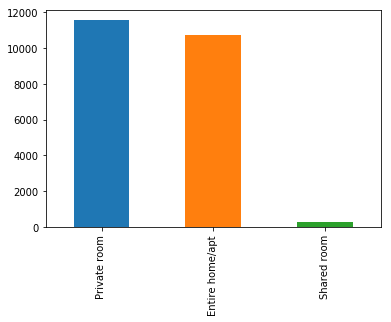

In [53]:
print('Number of NaN values for column room_type in the Berlin dataset: ', my_berlin['room_type'].isna().sum())
my_berlin['room_type'].value_counts().plot(kind='bar');

Number of NaN values for column room_type in the Boston dataset:  0


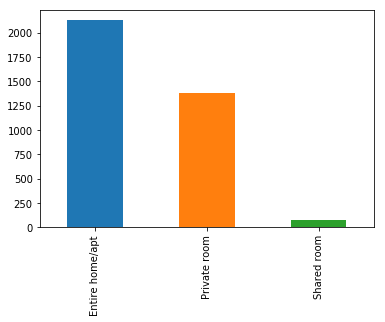

In [54]:
print('Number of NaN values for column room_type in the Boston dataset: ', my_boston['room_type'].isna().sum())
my_boston['room_type'].value_counts().plot(kind='bar');

In [55]:
my_berlin = pd.concat([my_berlin.drop('room_type', axis=1), 
           pd.get_dummies(my_berlin['room_type'], prefix='room_type')], axis=1)
my_boston = pd.concat([my_boston.drop('room_type', axis=1), 
           pd.get_dummies(my_boston['room_type'], prefix='room_type')], axis=1)

Column host_response_time

In [56]:
print('The column host_response_time has',
      round(100 * my_berlin['host_response_time'].isna().mean(), 2),
      '% of missing values for the Berlin dataset and',
      round(100 * my_boston['host_response_time'].isna().mean(), 2), 
      '% of missing values for the Boston dataset.'
     )

The column host_response_time has 57.17 % of missing values for the Berlin dataset and 13.14 % of missing values for the Boston dataset.


This uneven share of missing values poses a challenge for the data preparation. Since we want to use the same method of imputation on both datasets (Berlin and Boston), we make further investigations.

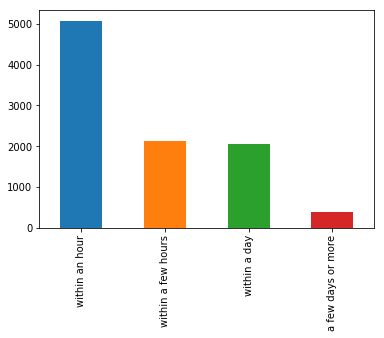

In [57]:
my_berlin['host_response_time'].value_counts().plot(kind='bar');

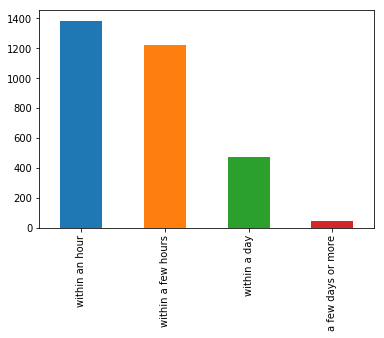

In [58]:
my_boston['host_response_time'].value_counts().plot(kind='bar');

We choose the following approach of cleaning the column host_response_time and imputing its missing values:
We combine the values "within an hour" and "within a few hours" into a joint value "within one or a few hours". Since the share of this new value is by far the biggest, we impute NaN values to be "within one or a few hours".

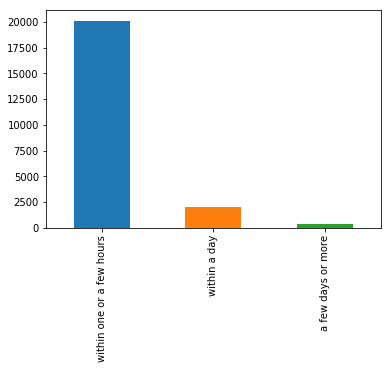

In [59]:
my_berlin['host_response_time'] = my_berlin['host_response_time'].replace('within an hour', 'within one or a few hours')
my_berlin['host_response_time'] = my_berlin['host_response_time'].replace('within a few hours', 'within one or a few hours')
my_berlin['host_response_time'].fillna('within one or a few hours', inplace = True)
my_berlin['host_response_time'].value_counts().plot(kind='bar');

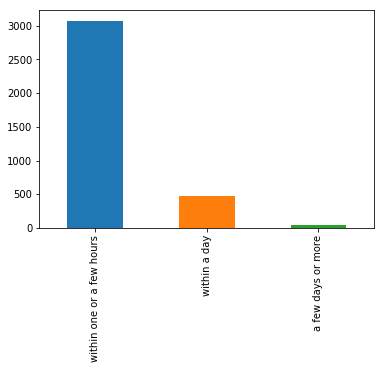

In [60]:
my_boston['host_response_time'] = my_boston['host_response_time'].replace('within an hour', 'within one or a few hours')
my_boston['host_response_time'] = my_boston['host_response_time'].replace('within a few hours', 'within one or a few hours')
my_boston['host_response_time'].fillna('within one or a few hours', inplace = True)
my_boston['host_response_time'].value_counts().plot(kind='bar');

In [61]:
my_berlin = pd.concat([my_berlin.drop('host_response_time', axis=1), 
           pd.get_dummies(my_berlin['host_response_time'], prefix='host_response_time')], axis=1)
my_boston = pd.concat([my_boston.drop('host_response_time', axis=1), 
           pd.get_dummies(my_boston['host_response_time'], prefix='host_response_time')], axis=1)

Column cancellation_policy

In [62]:
print('The column cancellation_policy contains', 
      my_berlin['cancellation_policy'].isna().sum(),
      'missing values for the Berlin dataset and ',
      my_boston['cancellation_policy'].isna().sum(),
      'for the Boston dataset.'
     )

The column cancellation_policy contains 0 missing values for the Berlin dataset and  0 for the Boston dataset.


In [63]:
my_berlin = pd.concat([my_berlin.drop('cancellation_policy', axis=1), 
           pd.get_dummies(my_berlin['cancellation_policy'], prefix='cancellation_policy')], axis=1)
my_boston = pd.concat([my_boston.drop('cancellation_policy', axis=1), 
           pd.get_dummies(my_boston['cancellation_policy'], prefix='cancellation_policy')], axis=1)

## Ensure that both cleaned datasets contain the same columns

In [64]:
print('Columns that are available in Boston dataset but not in Berlin dataset:', 
      set(my_boston.columns) - set(my_berlin.columns))

Columns that are available in Boston dataset but not in Berlin dataset: {'property_type_Bed & Breakfast', 'cancellation_policy_strict'}


In [65]:
my_berlin['property_type_Bed & Breakfast'] = [0] * len(my_berlin)
my_berlin['cancellation_policy_strict'] = [0] * len(my_berlin)

In [66]:
print('Columns that are available in Berlin dataset but not in Boston dataset:', 
      set(my_berlin.columns) - set(my_boston.columns))

Columns that are available in Berlin dataset but not in Boston dataset: {'cancellation_policy_super_strict_60', 'cancellation_policy_strict_14_with_grace_period'}


In [67]:
my_boston['cancellation_policy_super_strict_60'] = [0] * len(my_boston)
my_boston['cancellation_policy_strict_14_with_grace_period'] = [0] * len(my_boston)

## Final Check of Data Preparation

Special emphasis is put on:
- Are there any NaN values that we overlooked?
- Are there any columns of datatype 'object' that need to be revisited?

In [68]:
print('The Berlin dataset contains', 
      sum(my_berlin.isna().sum()),
      'missing values after our data preparations and',
      my_berlin.select_dtypes(include='object').shape[1],
      'columns of datatype object.'
     )

The Berlin dataset contains 0 missing values after our data preparations and 0 columns of datatype object.


In [69]:
print('The Boston dataset contains', 
      sum(my_boston.isna().sum()),
      'missing values after our data preparations and',
      my_boston.select_dtypes(include='object').shape[1],
      'columns of datatype object.'
     )

The Boston dataset contains 0 missing values after our data preparations and 0 columns of datatype object.


## Saving my_berlin and my_boston

Writing cleaned and prepared datasets into directory. They will be used in second Jupyter notebook 'AirBnBDataScience'.

In [70]:
my_berlin.to_csv(path_or_buf = './my_berlin_after_data_preparation.csv')
my_boston.to_csv(path_or_buf = './my_boston_after_data_preparation.csv')

# Step 4: Modeling

## Data Exploration through Heatmaps

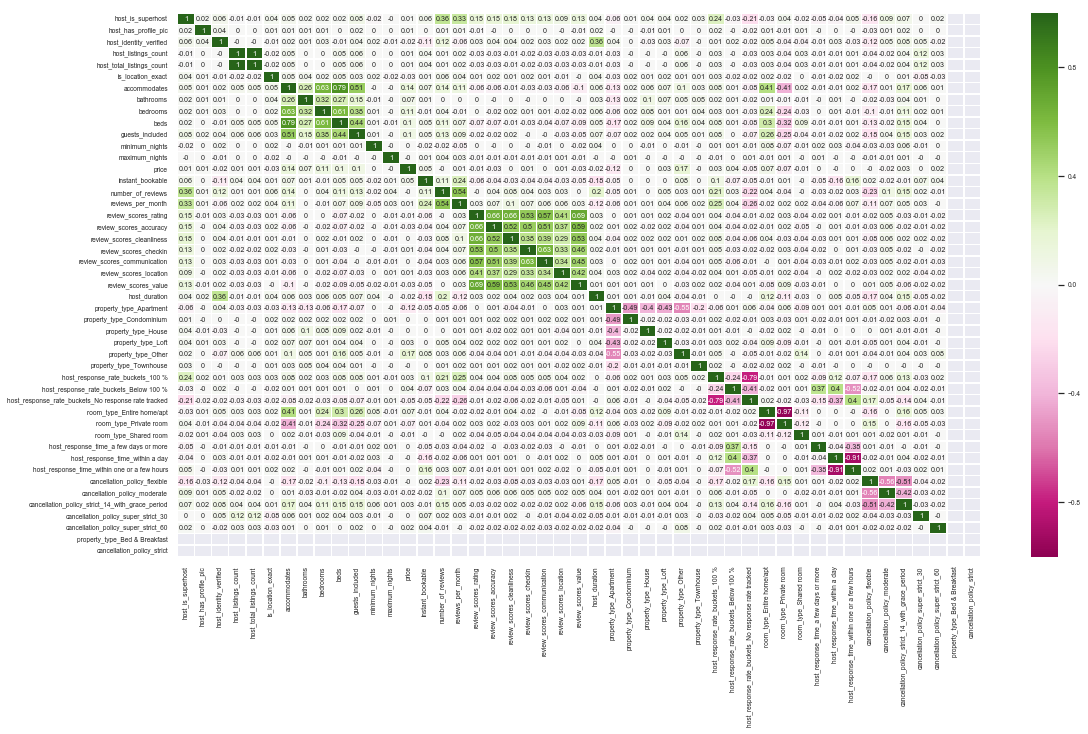

In [71]:
sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(round(my_berlin.corr(),2), annot=True, linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap="PiYG");

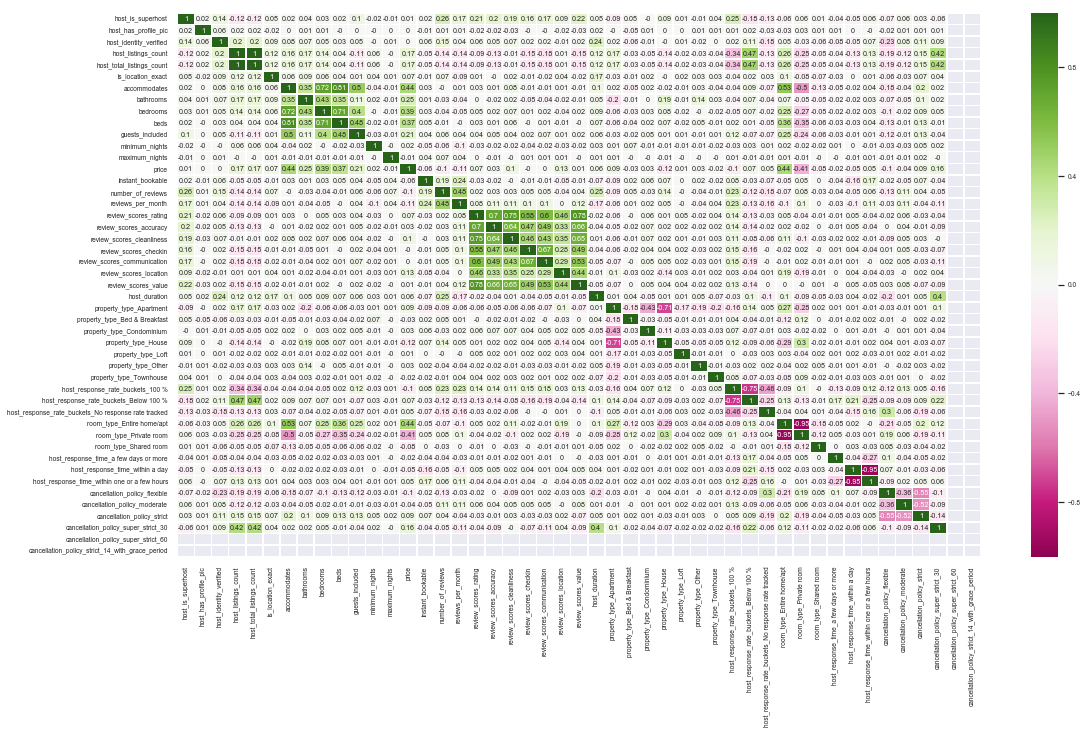

In [72]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(round(my_boston.corr(),2), annot=True, linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap="PiYG");

### Some interesting findings

- In both Berlin and Boston, the room type and the number of people a listing accomodates has a correlation. If the entire home / apartment is rented, a greater number of guests can be accommodated (correlation coefficient 0.41 and 0.53 resp.); if a private room is rented, a smaller number of guests can be accomodated (correlation coefficient -0.41 and -0.5 resp.).

- A host response rate below 100 % is positively correlated to a host response time of 'within a day' and 'a few days or more' (correlation coefficient 0.4 and 0.37 for Berlin and 0.21 and 0.17 for Boston). On the other hand it is negatively correlated to the host reponse time of 'within one or a few hours' (correlation coefficient -0.52 and -0.25 resp.)

# What remains to say

If you are interested to find out more about the AirBnB listings in Boston and Berlin, please feel free to check out the second Jupyter Notebook of this series named AirBnBDataScience.

The datasets used within this Jupyter Notebook can be found on Kaggle (https://www.kaggle.com/brittabettendorf/berlin-airbnb-data for the Berlin dataset and https://www.kaggle.com/airbnb/boston for the Boston dataset).

Author: F B

This project has been created as part of the Udacity Nanodegree "Data Scientist" 's first project "Write a Data Science Blog Post".

Created in November 2021